# **Stock (BMRI) Predictive Modelling**

## **Data Load & Understanding**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Connecting Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Retrieve the dataset
dataset = '/content/gdrive/MyDrive/Project/Stock Prediction/Data/Cleaned Data/BMRI_Cleaned.csv'
df = pd.read_csv(dataset)

Mounted at /content/gdrive


The data used in the research in this code is data that has been cleaned/pre-processed, so that the existing data is ready to be used in the modeling stage.

In [ ]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,3687.5,3687.5,3687.5,3687.5,2986.018799,0
1,2019-01-01,3687.5,3687.5,3687.5,3687.5,2986.018799,0
2,2019-01-02,3700.0,3700.0,3625.0,3662.5,2965.774414,45319200
3,2019-01-03,3637.5,3675.0,3550.0,3587.5,2905.041992,74174000
4,2019-01-04,3587.5,3725.0,3575.0,3725.0,3016.385254,78514000
...,...,...,...,...,...,...,...
1227,2023-12-21,5950.0,5975.0,5925.0,5975.0,5975.000000,50363900
1228,2023-12-22,5950.0,5975.0,5925.0,5975.0,5975.000000,29975600
1229,2023-12-27,6000.0,6025.0,5925.0,6000.0,6000.000000,43114900
1230,2023-12-28,6050.0,6150.0,6000.0,6125.0,6125.000000,75118700


In [ ]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1232 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.5+ KB


In [ ]:
# Check the number of columns and rows in the data
df.shape

(1232, 7)

In [ ]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,3906.919643,3951.680195,3857.217938,3904.502841,3570.321099,1.010377e+08
std,974.875551,979.128939,975.160970,978.628033,1098.047867,6.222859e+07
min,1880.000000,1900.000000,1830.000000,1860.000000,1633.401123,0.000000e+00
25%,3225.000000,3262.500000,3162.500000,3209.375000,2825.223694,6.188525e+07
50%,3725.000000,3756.250000,3675.000000,3712.500000,3201.196533,8.710460e+07
75%,4625.000000,4675.000000,4578.125000,4615.625000,4391.476196,1.247298e+08
max,6150.000000,6200.000000,6100.000000,6125.000000,6125.000000,7.702524e+08


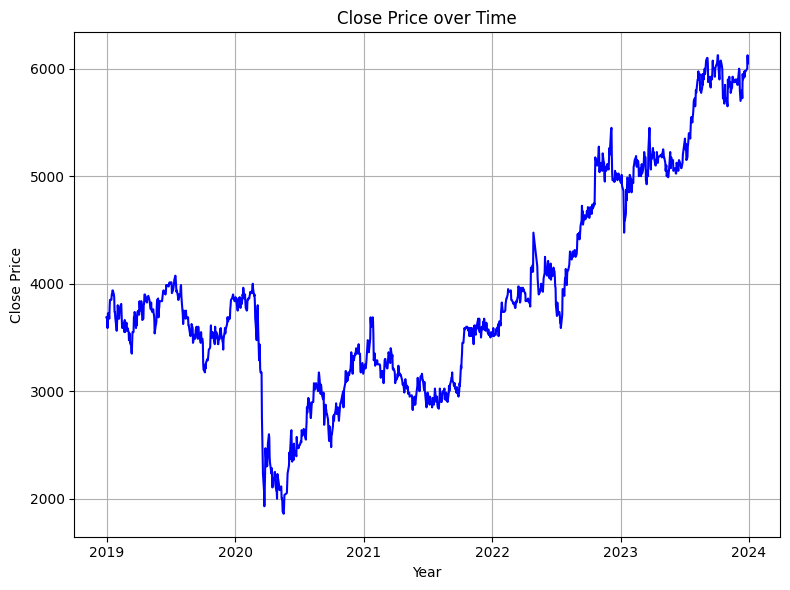

In [ ]:
# Visualize the actual price of the 'Close' attribute by time

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='blue')

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Close Price')

# Format the x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Chart title
plt.title('Close Price over Time')

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

The visualization is the closing price (close) of JKSE which has been summarized and later predictions will be made to determine the value with several models that will be tried.

## **Data Pre-Processing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### **Data Splitting**

In [ ]:
training_set = df.iloc[:, 4:5].values #creates a numpy array training_set

In [ ]:
training_set.dtype

dtype('float64')

In [ ]:
training_set

array([[3687.5],
       [3687.5],
       [3662.5],
       ...,
       [6000. ],
       [6125. ],
       [6050. ]])

In [ ]:
training_set.shape

(1232, 1)

### **Normalization (Feature Scaling)**

In [ ]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.42848769],
       [0.42848769],
       [0.42262603],
       ...,
       [0.97069168],
       [1.        ],
       [0.98241501]])

In [ ]:
training_set_scaled.shape

(1232, 1)

### **Creating Data Structure**

In [ ]:
X_train = training_set_scaled
Y_train = training_set_scaled

# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train

array([[0.42848769],
       [0.42848769],
       [0.42262603],
       ...,
       [0.97069168],
       [1.        ],
       [0.98241501]])

In [ ]:
X_train.shape

(1232, 1)

### **Reshaping**

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train

array([[[0.42848769]],

       [[0.42848769]],

       [[0.42262603]],

       ...,

       [[0.97069168]],

       [[1.        ]],

       [[0.98241501]]])

## **Modelling & Evaluation**

### **Long Short-Term Memory (LSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### **Building LSTM Architecture**

In [ ]:
# Creating a LSTM model
lstm_model = Sequential()

# Adding a LSTM layer
lstm_model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = False))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(units= 1))

# Compile the LSTM model
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### **Training LSTM Model**

In [ ]:
# Train the LSTM model
lstm_model.fit(X_train,Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 9s 14ms/step - loss: 0.1775
Epoch 2/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0351
Epoch 3/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0169
Epoch 4/100
39/39 [==============================] - 1s 13ms/step - loss: 0.0079
Epoch 5/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0065
Epoch 6/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 7/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 8/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 9/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 10/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 11/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 12/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 13/100
39/39 [========

#### **Testing LSTM Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[3687.5],
       [3687.5],
       [3662.5],
       ...,
       [6000. ],
       [6125. ],
       [6050. ]])

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.42848769],
       [0.42848769],
       [0.42262603],
       ...,
       [0.97069168],
       [1.        ],
       [0.98241501]])

In [ ]:
inputs.shape

(1232, 1)

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_lstm = lstm_model.predict(X_test)
predicted_stock_price_lstm = sc.inverse_transform(predicted_stock_price_lstm)

39/39 [==============================] - 2s 3ms/step


In [ ]:
predicted_stock_price_lstm

array([[3634.3857],
       [3634.3857],
       [3609.4321],
       ...,
       [5793.628 ],
       [5869.659 ],
       [5824.941 ]], dtype=float32)

In [ ]:
predicted_stock_price_lstm.shape

(1232, 1)

In [ ]:
# Add the predicted values to the DataFrame
df['LSTM Predictions'] = predicted_stock_price_lstm

# Print or visualize the results as needed
df[['Date', 'Close', 'LSTM Predictions']]

,Date,Close,LSTM Predictions
0,2018-12-31,3687.5,3634.385742
1,2019-01-01,3687.5,3634.385742
2,2019-01-02,3662.5,3609.432129
3,2019-01-03,3587.5,3534.966797
4,2019-01-04,3725.0,3671.932861
...,...,...,...
1227,2023-12-21,5975.0,5777.531738
1228,2023-12-22,5975.0,5777.531738
1229,2023-12-27,6000.0,5793.627930
1230,2023-12-28,6125.0,5869.659180


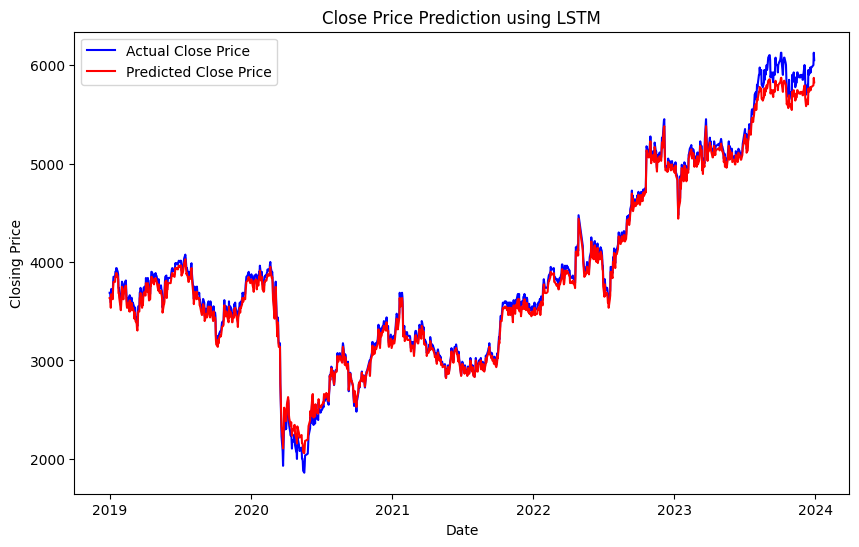

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['LSTM Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = lstm_model.predict(X_train)

# Calculate MSE
mse_lstm = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_lstm = sqrt(mse_lstm)

# Calculating MAPE
mape_lstm = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lstm}%')

39/39 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.00027603661663621844
Root Mean Squared Error (RMSE): 0.01661434972053431
Mean Absolute Percentage Error (MAPE): 375551.4115623108%


#### **Saving LSTM Model**

In [ ]:
from keras.models import load_model
lstm_model.save('BMRI_LSTM_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Gated Recurrent Unit (GRU)**

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

#### **Building GRU Architecture**

In [ ]:
# Creating a GRU model
gru_model = Sequential()

# Adding a GRU layer
gru_model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=False))
gru_model.add(Dropout(0.25))
gru_model.add(Dense(units=1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

#### **Training GRU Model**

In [ ]:
# Train the GRU model
gru_model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 10s 9ms/step - loss: 0.0965
Epoch 2/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0178
Epoch 3/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 4/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 5/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 6/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 7/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 8/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 9/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 10/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 11/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 12/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 13/100
39/39 [==============

#### **Testing GRU Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[3687.5],
       [3687.5],
       [3662.5],
       ...,
       [6000. ],
       [6125. ],
       [6050. ]])

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.42848769],
       [0.42848769],
       [0.42262603],
       ...,
       [0.97069168],
       [1.        ],
       [0.98241501]])

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_gru = gru_model.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)

39/39 [==============================] - 2s 4ms/step


In [ ]:
predicted_stock_price_gru

array([[3705.777 ],
       [3705.777 ],
       [3681.0754],
       ...,
       [5845.1694],
       [5920.1265],
       [5876.061 ]], dtype=float32)

In [ ]:
# Add the predicted values to the DataFrame
df['GRU Predictions'] = predicted_stock_price_gru

# Print or visualize the results as needed
df[['Date', 'Close', 'GRU Predictions']]

,Date,Close,GRU Predictions
0,2018-12-31,3687.5,3705.777100
1,2019-01-01,3687.5,3705.777100
2,2019-01-02,3662.5,3681.075439
3,2019-01-03,3587.5,3607.371582
4,2019-01-04,3725.0,3742.947998
...,...,...,...
1227,2023-12-21,5975.0,5829.280273
1228,2023-12-22,5975.0,5829.280273
1229,2023-12-27,6000.0,5845.169434
1230,2023-12-28,6125.0,5920.126465


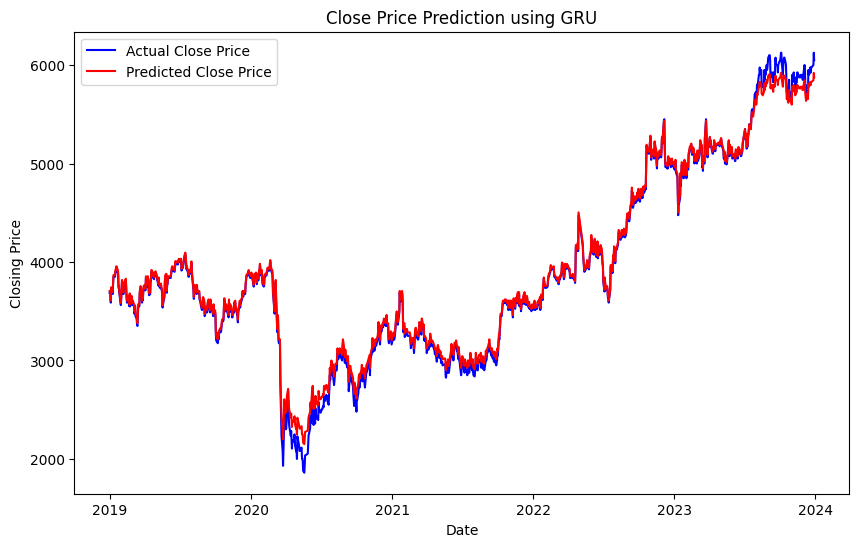

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['GRU Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using GRU')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = gru_model.predict(X_train)

# Calculate MSE
mse_gru = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_gru = sqrt(mse_gru)

# Calculating MAPE
mape_gru = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_gru}%')

39/39 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 0.00025035795924240484
Root Mean Squared Error (RMSE): 0.0158227039169165
Mean Absolute Percentage Error (MAPE): 552744.4301090746%


#### **Saving GRU Model**

In [ ]:
from keras.models import load_model
gru_model.save('BMRI_GRU_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Conclusion**

In [ ]:
model_comparison = pd.DataFrame({'Model': ['LSTM','GRU'], 'MSE': [mse_lstm,mse_gru], 'RMSE': [rmse_lstm,rmse_gru], 'MAPE': [mape_lstm*100,mape_gru*100]})
model_comparison

,Model,MSE,RMSE,MAPE
0,LSTM,0.000276,0.016614,3.755514e+07
1,GRU,0.000250,0.015823,5.527444e+07
